In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_csv('iris-data.csv')
df.columns

Index(['Unnamed: 0', 'lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo',
       'tipo_flor'],
      dtype='object')

In [8]:
df['tipo_flor'].value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

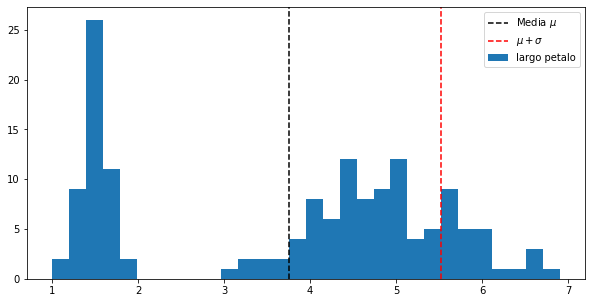

In [33]:
plt.figure(figsize=(10,5))
plt.hist(df['lar.petalo'],bins=30,label='largo petalo')
plt.axvline(np.mean(df['lar.petalo']),label='Media $\mu$',linestyle='--',c='k')
plt.axvline(np.mean(df['lar.petalo']) + np.std(df['lar.petalo']),label='$\mu + \sigma$',linestyle='--',c='r')
plt.legend()
plt.show()

Para estandarizar esta distribución debemos aplizar la formula de $Z$ 
$$Z = \frac{x-\mu}{\sigma} $$
Donde la distribución pasa a tner parametros adimencionales

In [35]:
x = df['lar.petalo']
z = (x - np.mean(x)) / np.std(x)
mu_z = np.mean(z)
std_z = np.std(z)

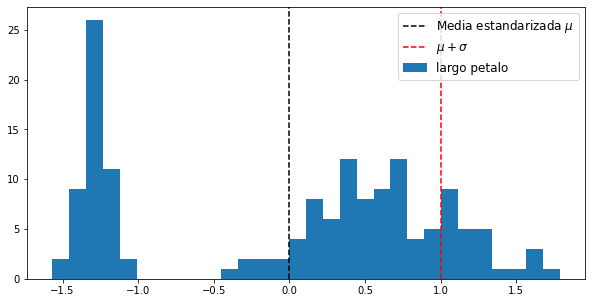

In [38]:
plt.figure(figsize=(10,5))
plt.hist(z,bins=30,label='largo petalo')
plt.axvline(mu_z,label='Media estandarizada $\mu$',linestyle='--',c='k')
plt.axvline(mu_z + std_z,label='$\mu + \sigma$',linestyle='--',c='r')
plt.legend(fontsize='large')
plt.show()

# Covarianza
<ul>
    <li>Mide la dirección (signo) de la relación de las variables</li>
    <li>No mide la magnitud</li>
    <li>Rango $Cov(X) = [-∞,∞ ]$</li>
</ul>

In [39]:
#Esto me entrga una matriz donde los valores de la covarianza son los que se repiten, y estan baja a la izquiera y arriba a la derecha
np.cov(df['lar.petalo'],df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

$$\begin{bmatrix}
   varianza_a & Cov \\
   Cov & varianza_b
\end{bmatrix}$$

# Correlación
<ul>
    <li>Mide la dirección (signo) de la relación de las variables</li>
    <li>Mide la magnitud</li>
    <li>Rango $Cov(X) = [-1,1 ]$</li>
    <li>Relación lineal perfecta: 1 o -1</li>
</ul>

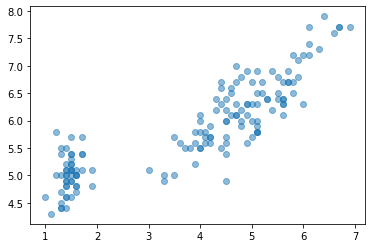

In [76]:
plt.scatter(df['lar.petalo'],df['lar.sepalo'],alpha=0.5)
plt.autoscale()

Correlación Kendall

In [119]:
corrK = df.corr(method = 'kendall')  #No mide necesariamente variables lineales
corrK 

,Unnamed: 0,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
Unnamed: 0,1.000000,0.525219,-0.273798,0.643863,0.681672,0.819232
lar.sepalo,0.525219,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.273798,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.643863,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.681672,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.819232,0.670444,-0.337614,0.822911,0.839687,1.000000


Correlación Pearson

In [72]:
corrP = df.corr(method = 'pearson')
corrP

,Unnamed: 0,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
lar.sepalo,0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
anc.sepalo,-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
lar.petalo,0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
anc.petalo,0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
tipo_flor,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


Correlación Spearman

Es la típica

In [54]:
corr = df.corr(method='spearman')
corr

,Unnamed: 0,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
Unnamed: 0,1.000000,0.734054,-0.415147,0.867812,0.879963,0.942830
lar.sepalo,0.734054,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.415147,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.867812,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.879963,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.942830,0.798078,-0.440290,0.935431,0.938179,1.000000


In [ ]:
df.columns

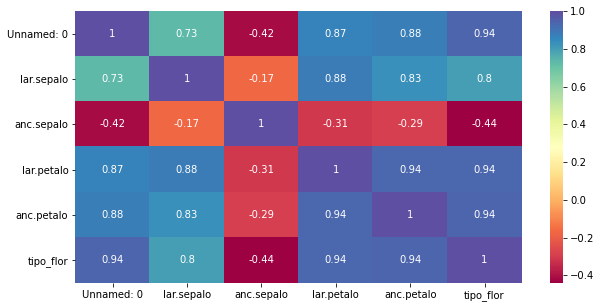

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, xticklabels=df.columns,yticklabels=df.columns,cmap='Spectral',annot=True)
plt.show()

<AxesSubplot:>

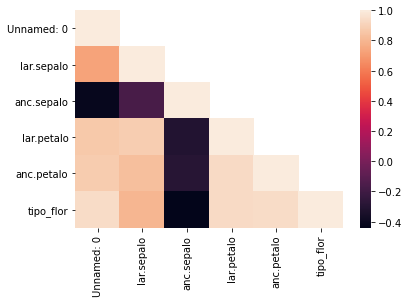

In [78]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices(len(corr),1)] = True
sns.heatmap(corr, xticklabels=df.columns,yticklabels=df.columns,mask=mask )

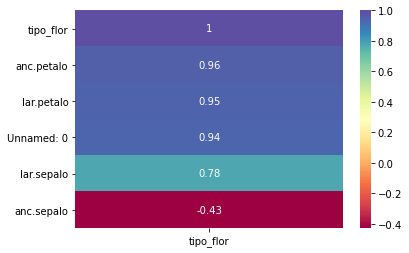

In [118]:
sns.heatmap(df.corr()[['tipo_flor']].sort_values(by=['tipo_flor'],ascending=False),cmap='Spectral',annot=True)
plt.show()